## **Problem statement**
----------------------------
#### The probelm is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.
 
----------------------------
## **Data structure**
----------------------------
- 'Traveldata_train.csv' contains data on-time performance of the trains along with passenger information.
- ‘Surveydata_train.csv’ contains the passenger feedback on various scale.

----------------------------
## **Data Information**
---------------------------
Each record in the database describes a random sample of individual passengers who travelled on this train. The on-time performance of the trains along with passenger information is published in ‘Traveldata_train.csv’. These collected survey detail reports are in ‘Surveydata_train.csv’.

Attribute Information (in order) in travelled data set:
- **ID:**                       passenger ID  
- **Gender:**                   passenger gender 
- **Customer_Type:**            passenger types e.g., loyal or not
- **Age:**                      Age of passenger
- **Type_Travel:**              passenger travelling personal or business etc. types 
- **Travel_Class:**             economic or business class 
- **Travel_Distance:**          Distance travelled by passenger  
- **Departure_Delay_in_Mins:**  Departure delay in minutes
- **Arrival_Delay_in_Mins:**    Arrival delay in minutes
---------------------------------------------------------
Attribute Information (in order) all categorical attributes in Survey data:
- **Overall_Experience:**          Overall passenger experience rating (Target variable)
- **Seat_Comfort:**                seat comfort, poor, needs improvement etc.
- **Seat_Class:**                  ordinary, green car etc.
- **Arrival_Time_Convenient:**     excellent, good etc.
- **Catering:**                    
- **Platform_Location:**       
- **Onboard_Wifi_Service:**     
- **Onboard_Entertainment:**      
- **Online_Support:**      
- **Ease_of_Online_Booking:**      
- **Onboard_Service :**  
- **Legroom:**   
- **Baggage_Handling:**     
- **CheckIn_Service:**  
- **Cleanliness:**
- **Online_Boarding:**
----------------------------

## **Objective**
----------------------------
- 'Overall_Experience is a target variable, an ordinal categorical variable
- To use the machine-learning method to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience.
- To understand which parameters play an important role in swaying passenger feedback towards a positive scale.

In [29]:
# #Import all the necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import copy

#from scipy.stats import chisquare

# Load sklearn libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

# Increase verbosity for displaying all columns in dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


%matplotlib inline

In [30]:
# Loading train and test data set
Travel_train = pd.read_csv("Traveldata_train.csv")
Survey_train = pd.read_csv("Surveydata_train.csv")
Travel_test = pd.read_csv("Traveldata_test.csv")
Survey_test = pd.read_csv("Surveydata_test.csv")

In [31]:
# Data overview
Travel_train.head(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [32]:
Travel_train.tail(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [33]:
# looking at the training data set size (rows) and features (columns)
for data_set in [Travel_train, Survey_train]:
    data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID              

- Travel data set has total 9 columns and 94379 rows, includes both numerical (integer and float) and object type
- Survey data set has total 17 columns (more features than in travel data set), includes all data object type except integer type 'ID' and 'Overall_Experience'
- Both training data set have some missing values

In [34]:
# Checking the the presence of null values in the dataset
for data_set in [Travel_train, Survey_train]:
    print('\n',data_set.isnull().sum().sort_values(ascending=False), 
          "\nMissing data in %\n",data_set.isnull().sum().sort_values(ascending=False)/len(data_set)*100,
          end=" " )


 Type_Travel                9226
Customer_Type              8951
Arrival_Delay_in_Mins       357
Gender                       77
Departure_Delay_in_Mins      57
Age                          33
ID                            0
Travel_Class                  0
Travel_Distance               0
dtype: int64 
Missing data in %
 Type_Travel                9.775480
Customer_Type              9.484101
Arrival_Delay_in_Mins      0.378262
Gender                     0.081586
Departure_Delay_in_Mins    0.060395
Age                        0.034965
ID                         0.000000
Travel_Class               0.000000
Travel_Distance            0.000000
dtype: float64 
 Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Platform_Location            30
Onboard_Wifi_Ser

### Observation
- The Type_Travel (9226)~9%, Customer_Type(8951) ~9%, Arrival_Time_Convenient(8930) ~9%, Catering(8741) ~9%, 
  and Onboard_Service(7601) ~8%, have the most missing data.
- We can test the performance either removing or imputing these features.
- We can remove the missing values for other columns, by removing the entire rows in the dataframe.

In [35]:
# Checking the nunique values in the dataset
for data_set in [Travel_train, Survey_train]:
    print('\n',data_set.nunique())


 ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

 ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64


In [36]:
# Cleaning of data, let's merge travel and survey training data set
# using the 'ID' of Travel_train (left side)
X_train = pd.merge(Travel_train, Survey_train, how = 'left', on ='ID')
X_train = X_train.set_index('ID')
X_train.shape

(94379, 24)

In [37]:
#X_train['Overall_Experience'].value_count()(normalize=True).mul(100).round(1).astype(str) + '%')
X_train.Overall_Experience.value_counts(normalize=True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

In [38]:
# Merging test travel and survey data set
X_test = pd.merge(Travel_test,Survey_test, how = 'left', on ='ID')
X_test = X_test.set_index('ID')
X_test.shape

(35602, 23)

In [39]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 99900001 to 99935602
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   35572 non-null  object 
 1   Customer_Type            32219 non-null  object 
 2   Age                      35591 non-null  float64
 3   Type_Travel              32154 non-null  object 
 4   Travel_Class             35602 non-null  object 
 5   Travel_Distance          35602 non-null  int64  
 6   Departure_Delay_in_Mins  35573 non-null  float64
 7   Arrival_Delay_in_Mins    35479 non-null  float64
 8   Seat_Comfort             35580 non-null  object 
 9   Seat_Class               35602 non-null  object 
 10  Arrival_Time_Convenient  32277 non-null  object 
 11  Catering                 32245 non-null  object 
 12  Platform_Location        35590 non-null  object 
 13  Onboard_Wifi_Service     35590 non-null  object 
 14  Onboard_Ente

## Exploratory data analysis (EDA) of  train data set

In [40]:
# Checking the the presence of null values in the dataset
missing_cols = X_train.columns[X_train.isnull().any()]
print(missing_cols)
print(len(missing_cols))


Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel',
       'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Seat_Comfort',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')
20


In [41]:
# Let's drop the missing rows for columns with less than 1% missing values
cols_minimal_missing = list(['Gender', 'Age', 
                             'Departure_Delay_in_Mins','Arrival_Delay_in_Mins', 
                             'Seat_Comfort', 'Platform_Location',
                             'Onboard_Wifi_Service', 'Onboard_Entertainment', 
                             'Online_Support','Ease_of_Online_Booking', 
                             'Legroom', 'Baggage_Handling',
                             'CheckIn_Service', 'Cleanliness', 'Online_Boarding'])
X_train = X_train.dropna( how='any', subset=cols_minimal_missing)
#X_test = X_test.dropna( how='any', subset=cols_minimal_missing)
# Checking the Train dataset
X_train.isna().sum()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93695 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   93695 non-null  object 
 1   Customer_Type            84875 non-null  object 
 2   Age                      93695 non-null  float64
 3   Type_Travel              84562 non-null  object 
 4   Travel_Class             93695 non-null  object 
 5   Travel_Distance          93695 non-null  int64  
 6   Departure_Delay_in_Mins  93695 non-null  float64
 7   Arrival_Delay_in_Mins    93695 non-null  float64
 8   Overall_Experience       93695 non-null  int64  
 9   Seat_Comfort             93695 non-null  object 
 10  Seat_Class               93695 non-null  object 
 11  Arrival_Time_Convenient  84909 non-null  object 
 12  Catering                 85034 non-null  object 
 13  Platform_Location        93695 non-null  object 
 14  Onboard_Wifi

In [42]:
#All columns
All_col = list(X_train.columns)
All_col

['Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Travel_Class',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Overall_Experience',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [43]:
#Creating a list of numerical columns
Num_col=list(X_train.drop(['Overall_Experience'],axis=1).select_dtypes(include=np.number).columns)
Num_col

['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [44]:
# Creating list of categorical columns
Cat_col = list(X_train.drop(['Overall_Experience'],axis=1).select_dtypes(include=['object']).columns)
Cat_col

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

### Univariate analysis for categorical variables

In [45]:
# Printing the % sub categories of each category
for i in Cat_col:
    print(X_train[i].value_counts(normalize=True))
    print('*'*40)

Female    0.507039
Male      0.492961
Name: Gender, dtype: float64
****************************************
Loyal Customer       0.81732
Disloyal Customer    0.18268
Name: Customer_Type, dtype: float64
****************************************
Business Travel    0.688524
Personal Travel    0.311476
Name: Type_Travel, dtype: float64
****************************************
Eco         0.522749
Business    0.477251
Name: Travel_Class, dtype: float64
****************************************
Acceptable           0.224356
Needs Improvement    0.222200
Good                 0.218528
Poor                 0.160894
Excellent            0.137382
Extremely Poor       0.036640
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.50261
Ordinary     0.49739
Name: Seat_Class, dtype: float64
****************************************
Good                 0.229245
Excellent            0.206774
Acceptable           0.177555
Needs Improvement    0.175482
Poor            

### Univariate analysis of numerical columns


In [46]:
# Checking summary statistics
X_train[Num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,93695.0,39.417738,15.116475,7.0,27.0,40.0,51.0,85.0
Travel_Distance,93695.0,1978.630119,1027.835001,50.0,1359.0,1923.0,2537.5,6951.0
Departure_Delay_in_Mins,93695.0,14.547318,37.476210,0.0,0.0,0.0,12.0,1305.0
Arrival_Delay_in_Mins,93695.0,14.976808,37.948297,0.0,0.0,0.0,13.0,1280.0


- The average age of passenger is around 39, close to median 40, the distribution is almost normal distribution
- The average Travel distance slightly larger than mean, approx normal distribution
- The average departure delay time  14.64 min, larger than median value, indication of right skewness
- The arrival delay time follows the similr departure dealy time trend

Age
Skew : -0.0


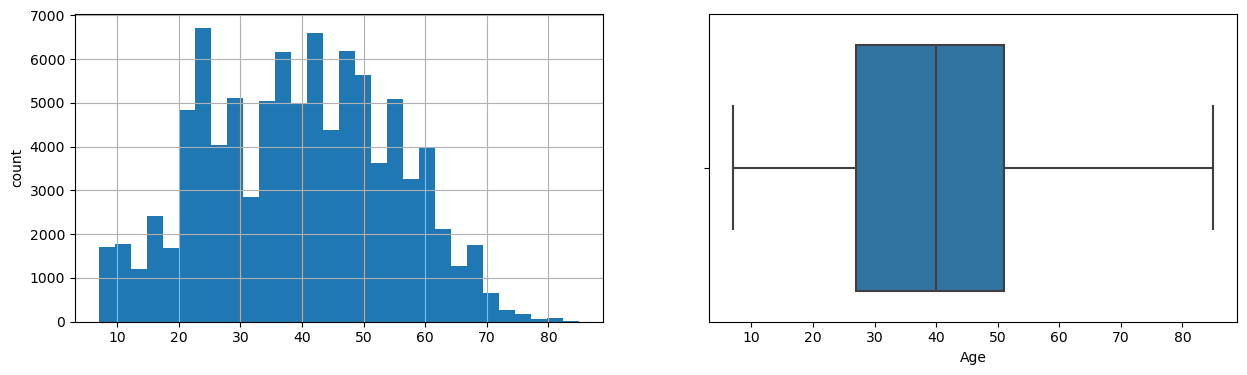

Travel_Distance
Skew : 0.47


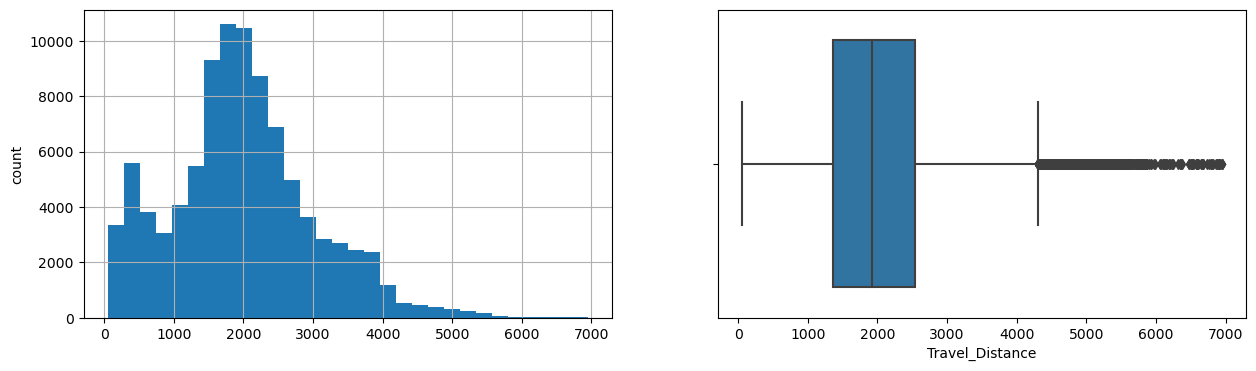

Departure_Delay_in_Mins
Skew : 6.43


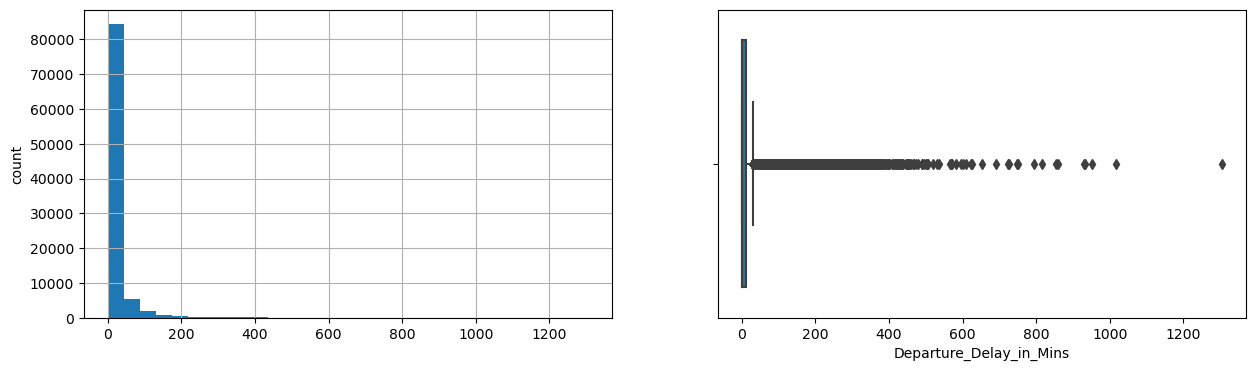

Arrival_Delay_in_Mins
Skew : 6.26


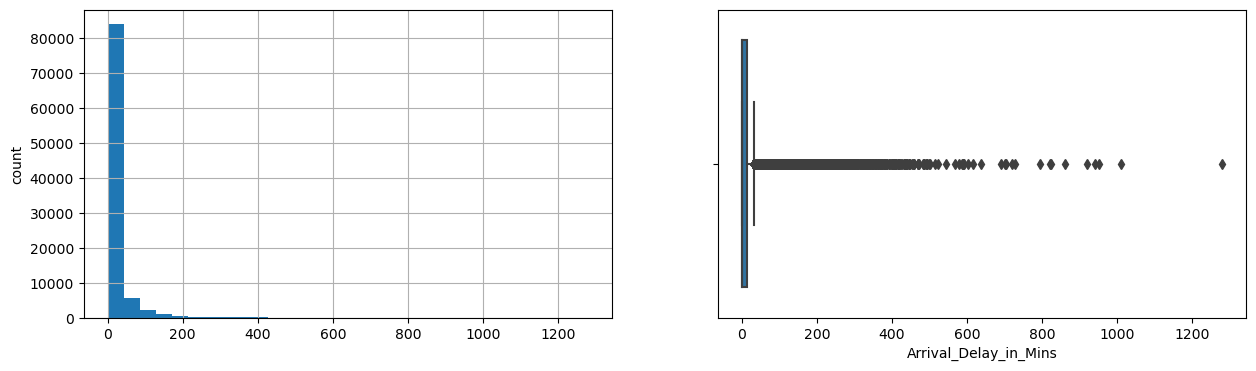

In [47]:
# Histogram plots of numerical columns 
data = X_train

for cols in Num_col:   #list of numerical columns in Train
    print(cols)
    print('Skew :',round(data[cols].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[cols].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=cols, data = data)
    plt.show()

* Departure delay time and arrival delay time have outliers, positive skewness
* Travel distance also has outliers

### Bivariate and Multivariate analysis

#### We have analyzed different categorical and numerical variables. Let's now check how does Overall experience is related with other categorical variables.


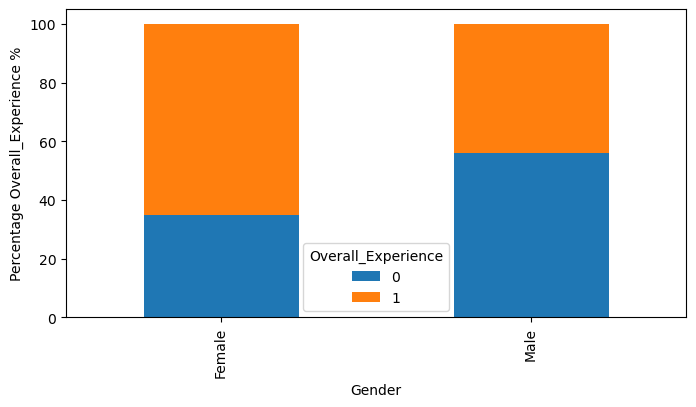

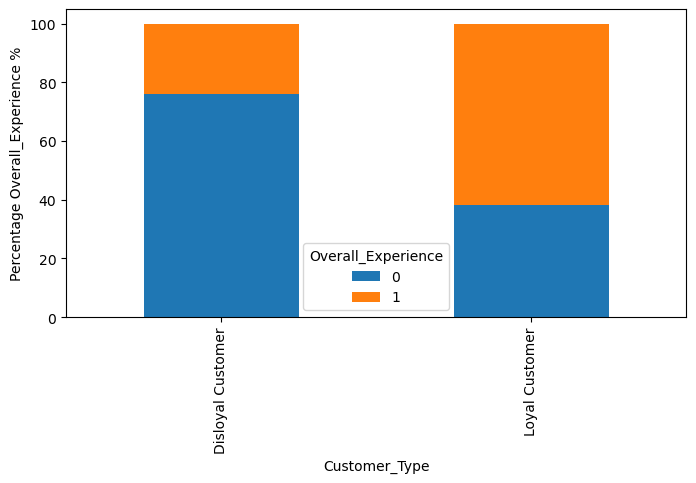

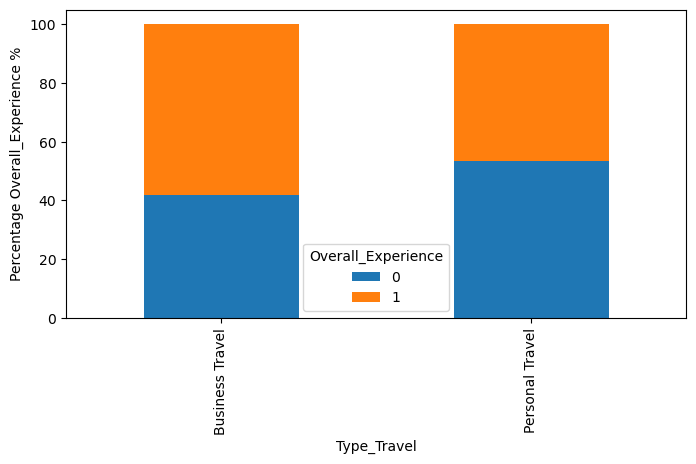

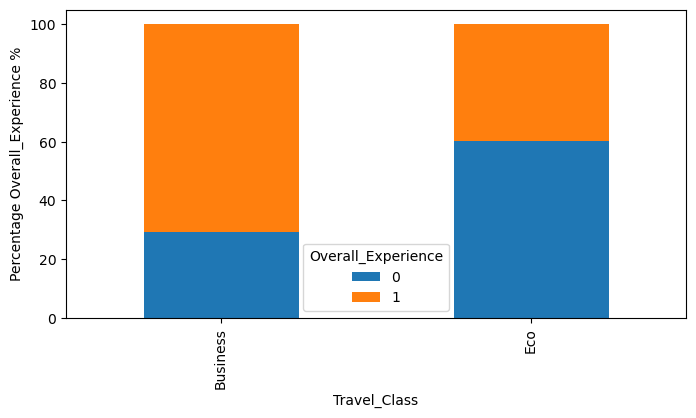

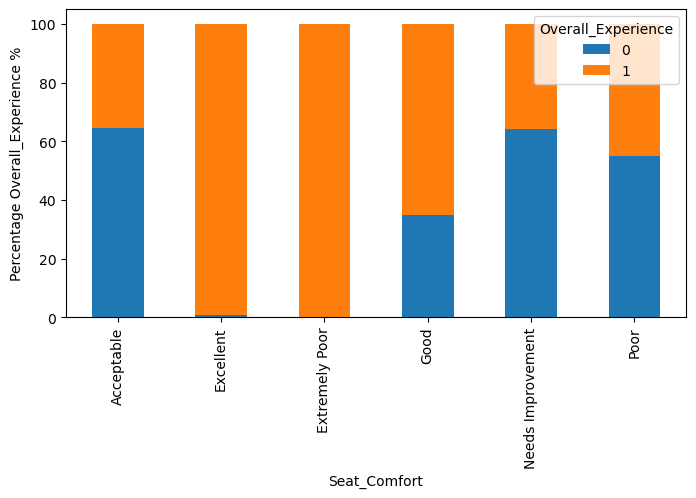

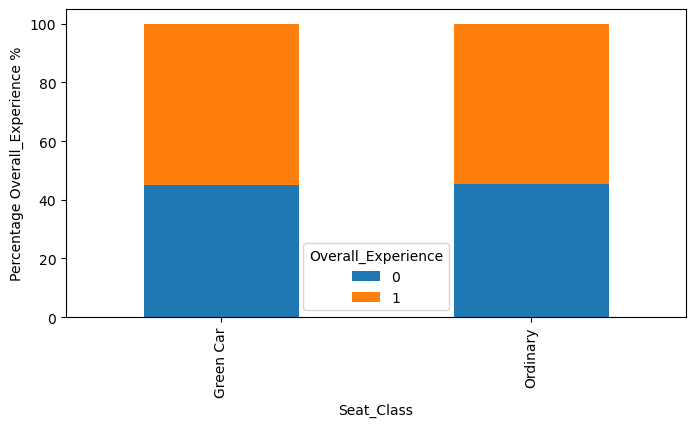

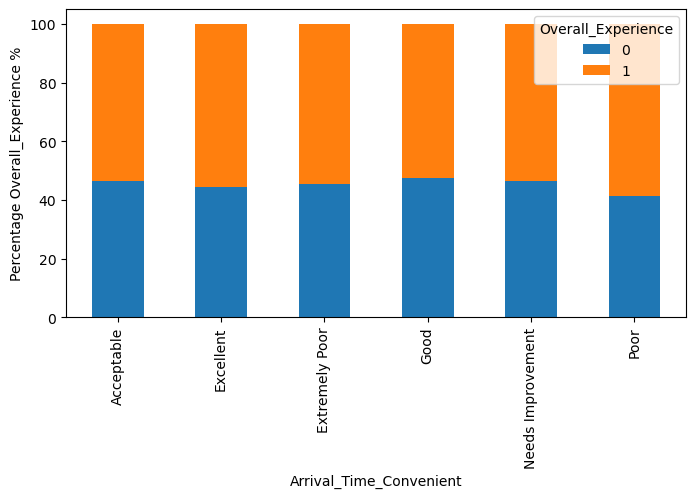

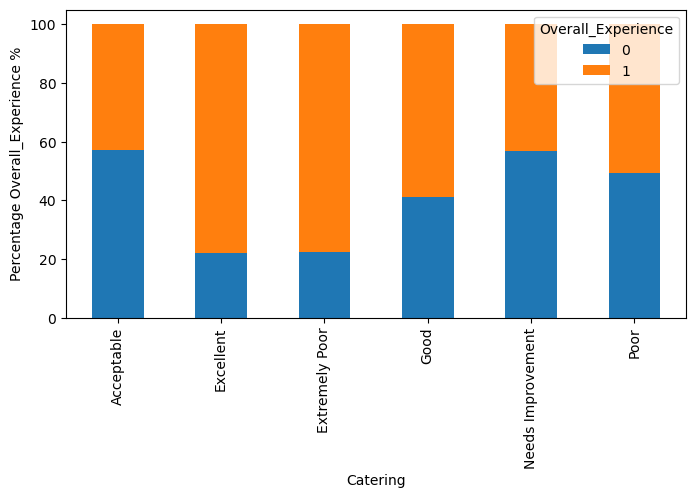

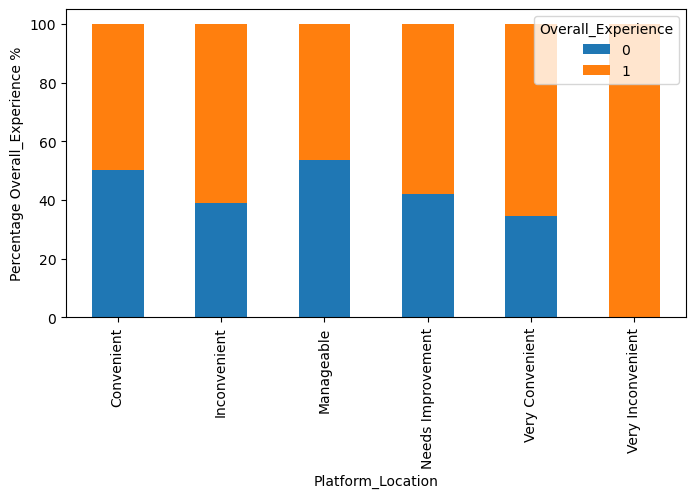

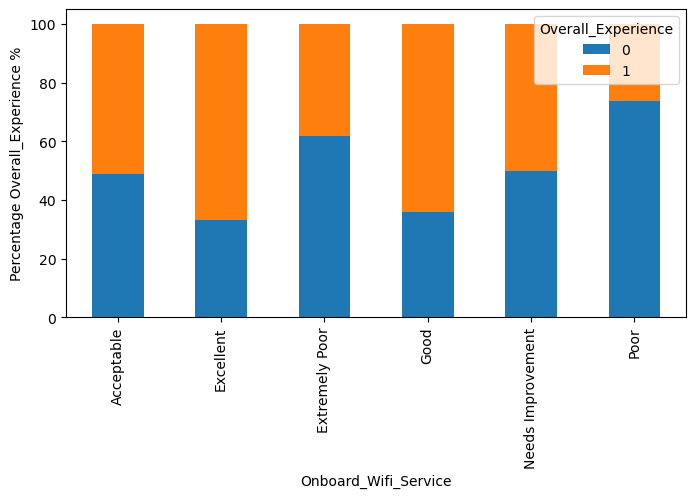

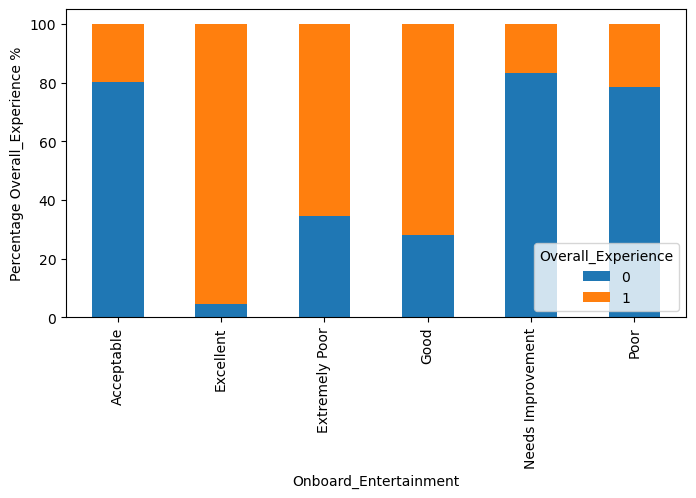

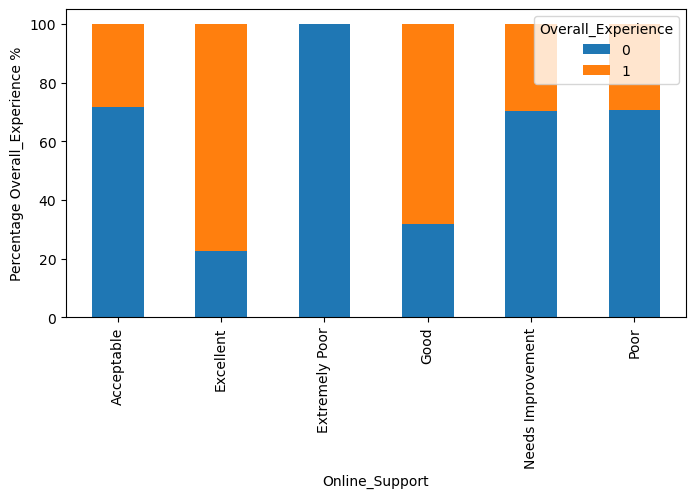

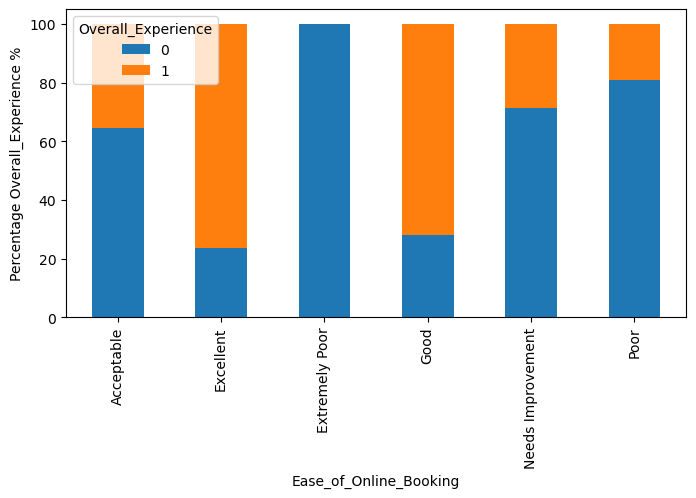

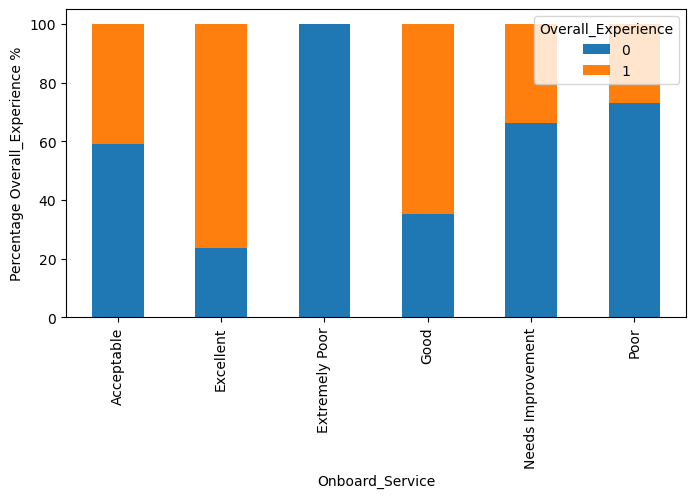

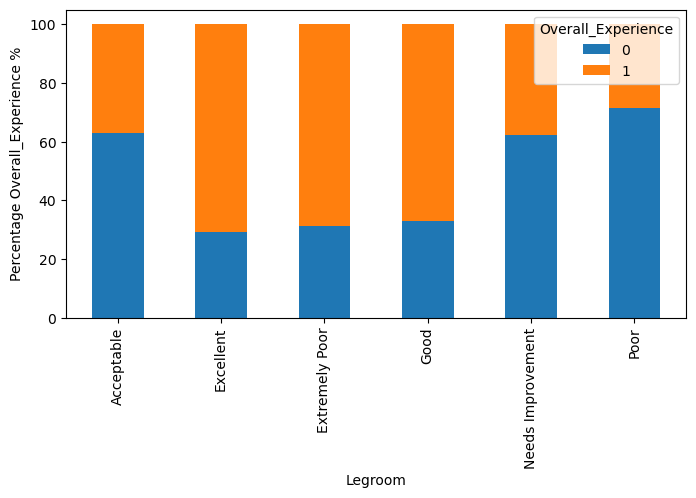

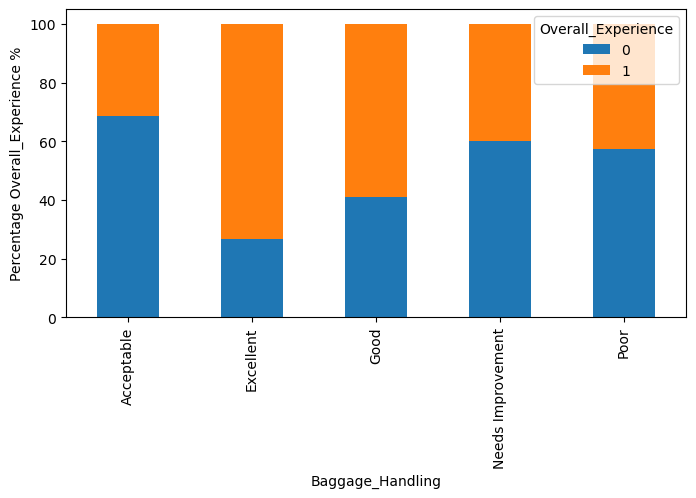

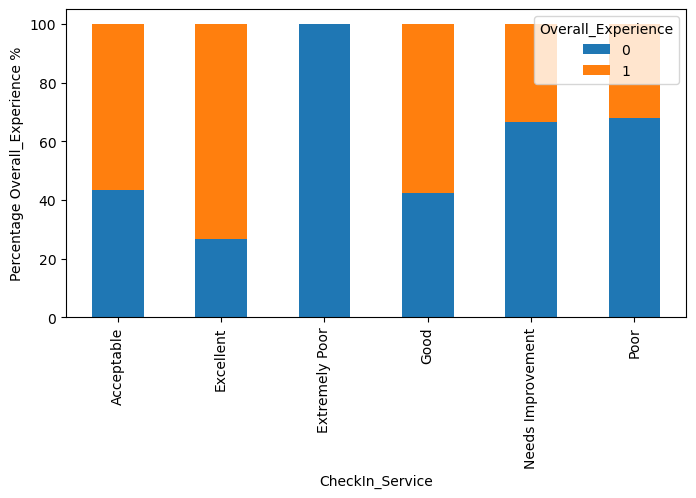

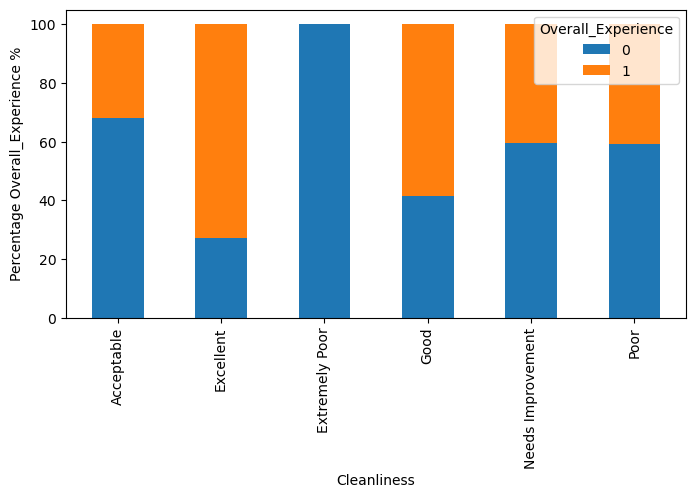

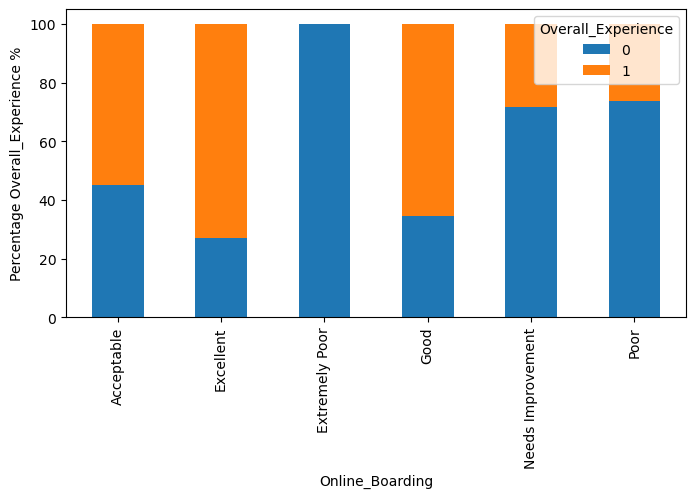

In [48]:
for i in Cat_col:
    if i!='Overall_Experience':
        (pd.crosstab(X_train[i],X_train['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Overall_Experience %')

**Observations:**
    
- Number of Female passenger has higher over all experience than male passenger in gender category
- The loyal customers have better over all experience, in the cutomer type category
- Business Travel type has better overall experience than personal type travel
- In tacel class category business type has better experience
- In seat comport category, excellent and extremely poos rating very different than other 4 experience
- In seta calss, the rating  are similar
- In arrival delay time delay rating is similar
- In Catering and platoform location has also mix entiment
- In other catory, the overall experience is mixed

**Checking the relation between overl experince and numerical variables**


In [49]:
# Mean of numerical variables grouped by attrition
X_train.groupby(['Overall_Experience'])[Num_col].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,
0,37.489206,2025.219803,17.589162,18.324184
1,41.017280,1939.988226,12.024387,12.200465


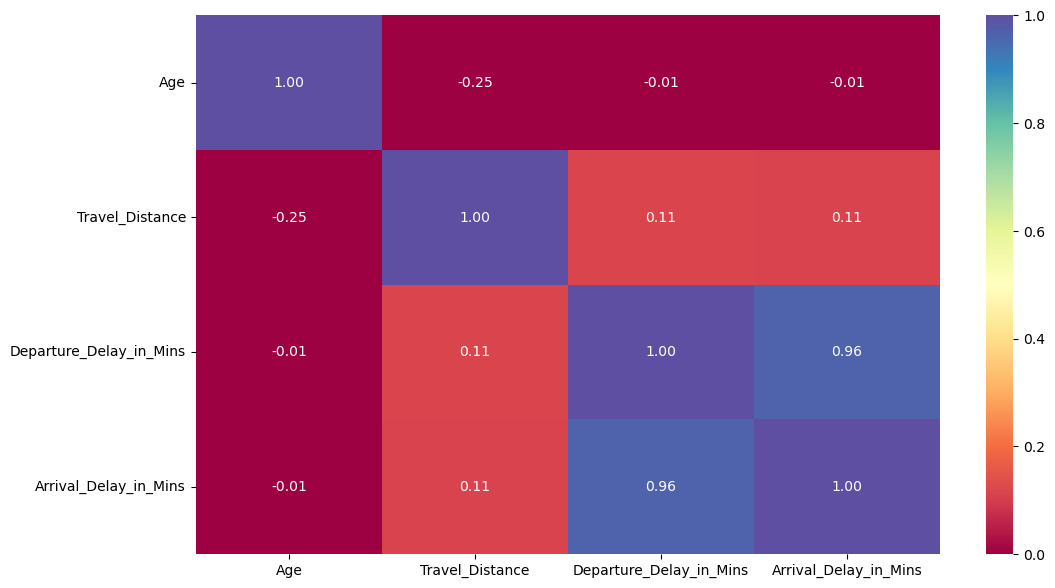

In [50]:
# Heat map for numerical variables
plt.figure(figsize=(12, 7))
sns.heatmap(data[Num_col].corr(), annot=True, vmin=0, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**
- The overall experience is around 50% in all categories with small variation**

## Preprocessing the data and removing outliers

In [51]:
X_train.isnull().sum().sort_values()

Gender                        0
CheckIn_Service               0
Baggage_Handling              0
Legroom                       0
Ease_of_Online_Booking        0
Online_Support                0
Onboard_Entertainment         0
Onboard_Wifi_Service          0
Platform_Location             0
Cleanliness                   0
Online_Boarding               0
Seat_Comfort                  0
Overall_Experience            0
Arrival_Delay_in_Mins         0
Departure_Delay_in_Mins       0
Travel_Distance               0
Travel_Class                  0
Age                           0
Seat_Class                    0
Onboard_Service            7466
Catering                   8661
Arrival_Time_Convenient    8786
Customer_Type              8820
Type_Travel                9133
dtype: int64

In [52]:
# Removing outliers in train data
for idata in [X_train]:
    for i in Num_col:
        print("i==",i)
        data = idata[i]
        data_mean, data_std = np.mean(data), np.std(data)
        print("Mean, Std:",data_mean, data_std)
        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        print("Lower, Upper:", lower, upper)
        # identify outliers
        outliers = [x for x in data if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        # remove outliers
        idata.drop(idata[idata[i] >= upper].index, inplace = True)
    
print(X_train.isnull().sum().sort_values())

i== Age
Mean, Std: 39.41773840653183 15.11639446067316
Lower, Upper: -5.9314449754876435 84.76692178855131
Identified outliers: 18
i== Travel_Distance
Mean, Std: 1978.4658133800185 1027.7808095109901
Lower, Upper: -1104.8766151529517 5061.808241912989
Identified outliers: 617
i== Departure_Delay_in_Mins
Mean, Std: 14.296174511068129 36.70645910020037
Lower, Upper: -95.82320278953298 124.41555181166925
Identified outliers: 1948
i== Arrival_Delay_in_Mins
Mean, Std: 10.786449644393713 21.851272099260086
Lower, Upper: -54.767366653386546 76.34026594217397
Identified outliers: 2720
Gender                        0
CheckIn_Service               0
Baggage_Handling              0
Legroom                       0
Ease_of_Online_Booking        0
Online_Support                0
Onboard_Entertainment         0
Onboard_Wifi_Service          0
Platform_Location             0
Cleanliness                   0
Online_Boarding               0
Seat_Comfort                  0
Overall_Experience            0


In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   88392 non-null  object 
 1   Customer_Type            80074 non-null  object 
 2   Age                      88392 non-null  float64
 3   Type_Travel              79734 non-null  object 
 4   Travel_Class             88392 non-null  object 
 5   Travel_Distance          88392 non-null  int64  
 6   Departure_Delay_in_Mins  88392 non-null  float64
 7   Arrival_Delay_in_Mins    88392 non-null  float64
 8   Overall_Experience       88392 non-null  int64  
 9   Seat_Comfort             88392 non-null  object 
 10  Seat_Class               88392 non-null  object 
 11  Arrival_Time_Convenient  80106 non-null  object 
 12  Catering                 80198 non-null  object 
 13  Platform_Location        88392 non-null  object 
 14  Onboard_Wifi

In [57]:
#3. Encoding the categorical variables ib both train and test dataset
X_train = X_train.replace(['Male', 'Female'], [1,0])
X_train = X_train.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], 
           [6, 5, 4, 3, 2, 1])
X_train = X_train.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
X_train = X_train.replace(['Business Travel', 'Personal Travel'], [1,0])
X_train = X_train.replace(['Business', 'Eco'], [1,0])
X_train = X_train.replace(['Green Car', 'Ordinary'], [1,0])
X_train = X_train.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], 
           [6, 5, 4, 3, 2, 1])

X_test = X_test.replace(['Male', 'Female'], [1,0])
X_test = X_test.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], 
           [6, 5, 4, 3, 2, 1])
X_test = X_test.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
X_test = X_test.replace(['Business Travel', 'Personal Travel'], [1,0])
X_test = X_test.replace(['Business', 'Eco'], [1,0])
X_test = X_test.replace(['Green Car', 'Ordinary'], [1,0])
X_test = X_test.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], 
           [6, 5, 4, 3, 2, 1])
    
    
X_train.head(10)
                

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,,,,
98800001,0,1.0,52.0,NaN,1,272,0.0,5.0,0,3,1,6.0,6.0,6,5,3,4,3,3.0,4,3,5,3,2
98800002,1,1.0,48.0,0.0,0,2200,9.0,0.0,0,2,0,6.0,2.0,3,5,2,5,5,6.0,3,2,3,5,5
98800004,0,1.0,44.0,1.0,1,780,13.0,18.0,0,4,0,3.0,NaN,3,4,3,4,4,4.0,4,4,5,4,4
98800005,0,1.0,50.0,1.0,1,1981,0.0,0.0,1,4,0,4.0,4.0,4,3,5,6,5,5.0,5,5,5,5,5
98800006,1,1.0,44.0,1.0,1,2810,0.0,0.0,1,3,0,3.0,4.0,3,5,6,5,4,4.0,5,4,4,4,4
98800007,1,1.0,56.0,0.0,0,2029,0.0,0.0,0,5,1,6.0,5.0,2,5,5,5,5,5.0,6,3,6,4,5
98800008,1,1.0,65.0,0.0,1,853,0.0,3.0,0,4,1,NaN,4.0,2,6,6,5,5,5.0,4,5,5,5,6
98800009,1,1.0,22.0,0.0,0,1636,1.0,0.0,0,3,1,3.0,3.0,3,4,3,4,4,4.0,4,3,4,3,4
98800010,1,1.0,57.0,1.0,1,306,0.0,0.0,0,3,0,5.0,5.0,5,4,5,5,3,3.0,3,3,4,3,4


In [58]:
# rescaling data with normalization as they vary from 0 to 60 (for age)
for col in X_train.columns:
    print(X_train[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 
# rescaling data with normalization as they vary from 0 to 60 (for age)
for col in X_test.columns:
    print(X_est[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40)

0    0.507342
1    0.492658
Name: Gender, dtype: float64
****************************************
1.0    0.816907
0.0    0.183093
Name: Customer_Type, dtype: float64
****************************************
39.0    0.028645
25.0    0.026677
40.0    0.024946
44.0    0.024323
41.0    0.024007
42.0    0.023837
43.0    0.022943
48.0    0.022740
47.0    0.022694
22.0    0.022615
23.0    0.022378
45.0    0.022298
38.0    0.022208
37.0    0.021959
36.0    0.021902
24.0    0.021846
26.0    0.021823
46.0    0.021314
49.0    0.021258
27.0    0.020986
52.0    0.020194
51.0    0.020058
50.0    0.019391
30.0    0.019074
35.0    0.018984
29.0    0.018848
53.0    0.018814
54.0    0.018723
55.0    0.018237
57.0    0.017931
33.0    0.017694
56.0    0.017626
59.0    0.017524
58.0    0.017185
34.0    0.017015
60.0    0.016551
28.0    0.015929
31.0    0.015329
21.0    0.014526
32.0    0.014390
20.0    0.014085
18.0    0.009299
17.0    0.009266
16.0    0.008915
19.0    0.008632
61.0    0.008462
62.0    0.0

NameError: name 'X_est' is not defined

In [59]:
# Removing missing data with mode

si1=SimpleImputer(strategy='most_frequent')

median_imputed_col=['Onboard_Service','Arrival_Time_Convenient',
                    'Customer_Type','Type_Travel','Catering','Cleanliness',
                    'Onboard_Entertainment', 'Age','Platform_Location','Onboard_Wifi_Service',   
                    'Ease_of_Online_Booking', 'Seat_Comfort','CheckIn_Service',       
                    'Legroom','Online_Support','Departure_Delay_in_Mins', 
                    'Gender','Baggage_Handling','Arrival_Delay_in_Mins','Online_Boarding']

X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])
print(X_train.isna().sum().sort_values(),'\n')
print(X_test.isna().sum().sort_values())

Gender                     0
CheckIn_Service            0
Baggage_Handling           0
Legroom                    0
Onboard_Service            0
Ease_of_Online_Booking     0
Online_Support             0
Onboard_Entertainment      0
Onboard_Wifi_Service       0
Platform_Location          0
Catering                   0
Arrival_Time_Convenient    0
Seat_Class                 0
Seat_Comfort               0
Overall_Experience         0
Arrival_Delay_in_Mins      0
Departure_Delay_in_Mins    0
Travel_Distance            0
Travel_Class               0
Type_Travel                0
Age                        0
Customer_Type              0
Cleanliness                0
Online_Boarding            0
dtype: int64 

Gender                     0
CheckIn_Service            0
Baggage_Handling           0
Legroom                    0
Onboard_Service            0
Ease_of_Online_Booking     0
Online_Support             0
Onboard_Entertainment      0
Onboard_Wifi_Service       0
Platform_Location          0

**Observation**
- No values are missing on both train and test dataset

## MODEL EVALUATION

In [60]:
# Set the target variable
y_train= X_train['Overall_Experience']
#x_train=X_train.drop(['Overall_Experience'],axis=1)
x_train=X_train.drop(['Overall_Experience','Departure_Delay_in_Mins'], axis=1)
X_test=X_test.drop(['Departure_Delay_in_Mins'], axis=1)
x_train.info()
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88392 entries, 98800001 to 98894379
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   88392 non-null  float64
 1   Customer_Type            88392 non-null  float64
 2   Age                      88392 non-null  float64
 3   Type_Travel              88392 non-null  float64
 4   Travel_Class             88392 non-null  int64  
 5   Travel_Distance          88392 non-null  int64  
 6   Arrival_Delay_in_Mins    88392 non-null  float64
 7   Seat_Comfort             88392 non-null  float64
 8   Seat_Class               88392 non-null  int64  
 9   Arrival_Time_Convenient  88392 non-null  float64
 10  Catering                 88392 non-null  float64
 11  Platform_Location        88392 non-null  float64
 12  Onboard_Wifi_Service     88392 non-null  float64
 13  Onboard_Entertainment    88392 non-null  float64
 14  Online_Suppo

## **Building the model**

We will be building 2 different models:

- **Logistic Regression**
- **Random Forest**

In [61]:
# Fitting logistic regression model
#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree

lg=LogisticRegression()
print(y_train.info())
lg.fit(x_train,y_train)


<class 'pandas.core.series.Series'>
Int64Index: 88392 entries, 98800001 to 98894379
Series name: Overall_Experience
Non-Null Count  Dtype
--------------  -----
88392 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB
None


LogisticRegression()

In [62]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No(0)', 'Yes(1)'], yticklabels=['No(0)', 'Yes(1)'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Let's check the model performance**

              precision    recall  f1-score   support

           0       0.79      0.70      0.74     39504
           1       0.78      0.85      0.81     48888

    accuracy                           0.78     88392
   macro avg       0.78      0.77      0.78     88392
weighted avg       0.78      0.78      0.78     88392



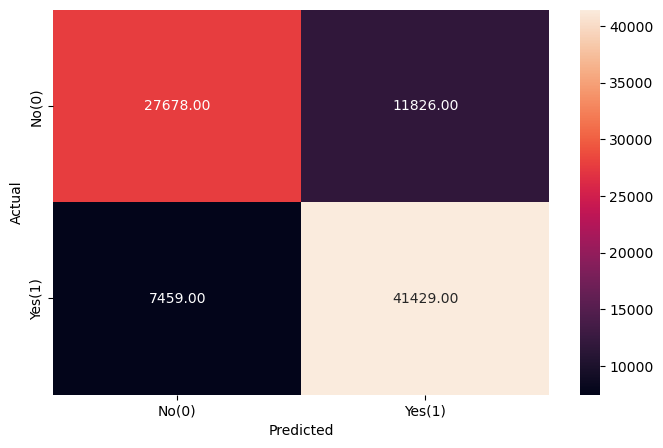

In [63]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

- The precission and recall values are 78 % and 85% for Overall experience 1 (good)
- Accuracy is alsos about 81 %, which is an indication of a decent performance of model in training data set

In [64]:
print(X_test.shape)
sub = pd.DataFrame(X_test)

res = lg.predict(X_test)

sub["Overall_Experience"] = res
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("Submission1.csv", index = True)
sub_to_file

(35602, 22)


,Overall_Experience
ID,
99900001,1
99900002,0
99900003,0
99900004,0
99900005,1
...,...
99935598,1
99935599,1
99935600,0


### **Random Forest**
- **Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction. 
- The results from all the **decision trees** are combined and the final prediction is made using **voting** (for classification problems) or **averaging** (for regression problems).**

In [65]:
# Create a Random Forest regression model 
rf_estimator = RandomForestClassifier(random_state = 1, oob_score = True)
rf_estimator.fit(x_train,y_train)

#X_test=X_test.drop(['Overall_Experience'], axis=1)
submission = pd.DataFrame(X_test)

result = rf_estimator.predict(X_test)

submission["Overall_Experience"] = result
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("Submission4.csv", index = True)
sub_to_file

,Overall_Experience
ID,
99900001,1
99900002,0
99900003,0
99900004,0
99900005,1
...,...
99935598,1
99935599,1
99935600,0
